In [21]:
#Import everything

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

from sklearn import tree

import pandas as pd

from matplotlib import pyplot as plt

In [3]:
# Read training data for Titanic problem
train = pd.read_csv('C:/Users/n8hou//Desktop/train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
# Feature selection and NaN removal

# Select Numerical / categorical columns
feature_cols = ['Sex', 'Age', 'Pclass', 'Fare']
feature_subset = ['Survived', 'Sex', 'Age', 'Pclass', 'Fare']

# Map male to 0 and female to 1
mapping = { k: v for v, k in enumerate(train.Sex.unique())}

print(mapping)
train['Sex'] = train.Sex.map(mapping)
print(train[feature_cols])

X = train[feature_cols].dropna()
# Remove NaN values
X = X.dropna()
print(X)
y = train[feature_subset].dropna().Survived
print(y)

# Apply variance thresholding with a threshold of 0.5
sel = VarianceThreshold(threshold=0.5)
X = sel.fit_transform(X)

{0: 0, 1: 1}
     Sex   Age  Pclass     Fare
0      0  22.0       3   7.2500
1      1  38.0       1  71.2833
2      1  26.0       3   7.9250
3      1  35.0       1  53.1000
4      0  35.0       3   8.0500
..   ...   ...     ...      ...
886    0  27.0       2  13.0000
887    1  19.0       1  30.0000
888    1   NaN       3  23.4500
889    0  26.0       1  30.0000
890    0  32.0       3   7.7500

[891 rows x 4 columns]
     Sex   Age  Pclass     Fare
0      0  22.0       3   7.2500
1      1  38.0       1  71.2833
2      1  26.0       3   7.9250
3      1  35.0       1  53.1000
4      0  35.0       3   8.0500
..   ...   ...     ...      ...
885    1  39.0       3  29.1250
886    0  27.0       2  13.0000
887    1  19.0       1  30.0000
889    0  26.0       1  30.0000
890    0  32.0       3   7.7500

[714 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [31]:
# Train Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X, y)
print('Done')

Done


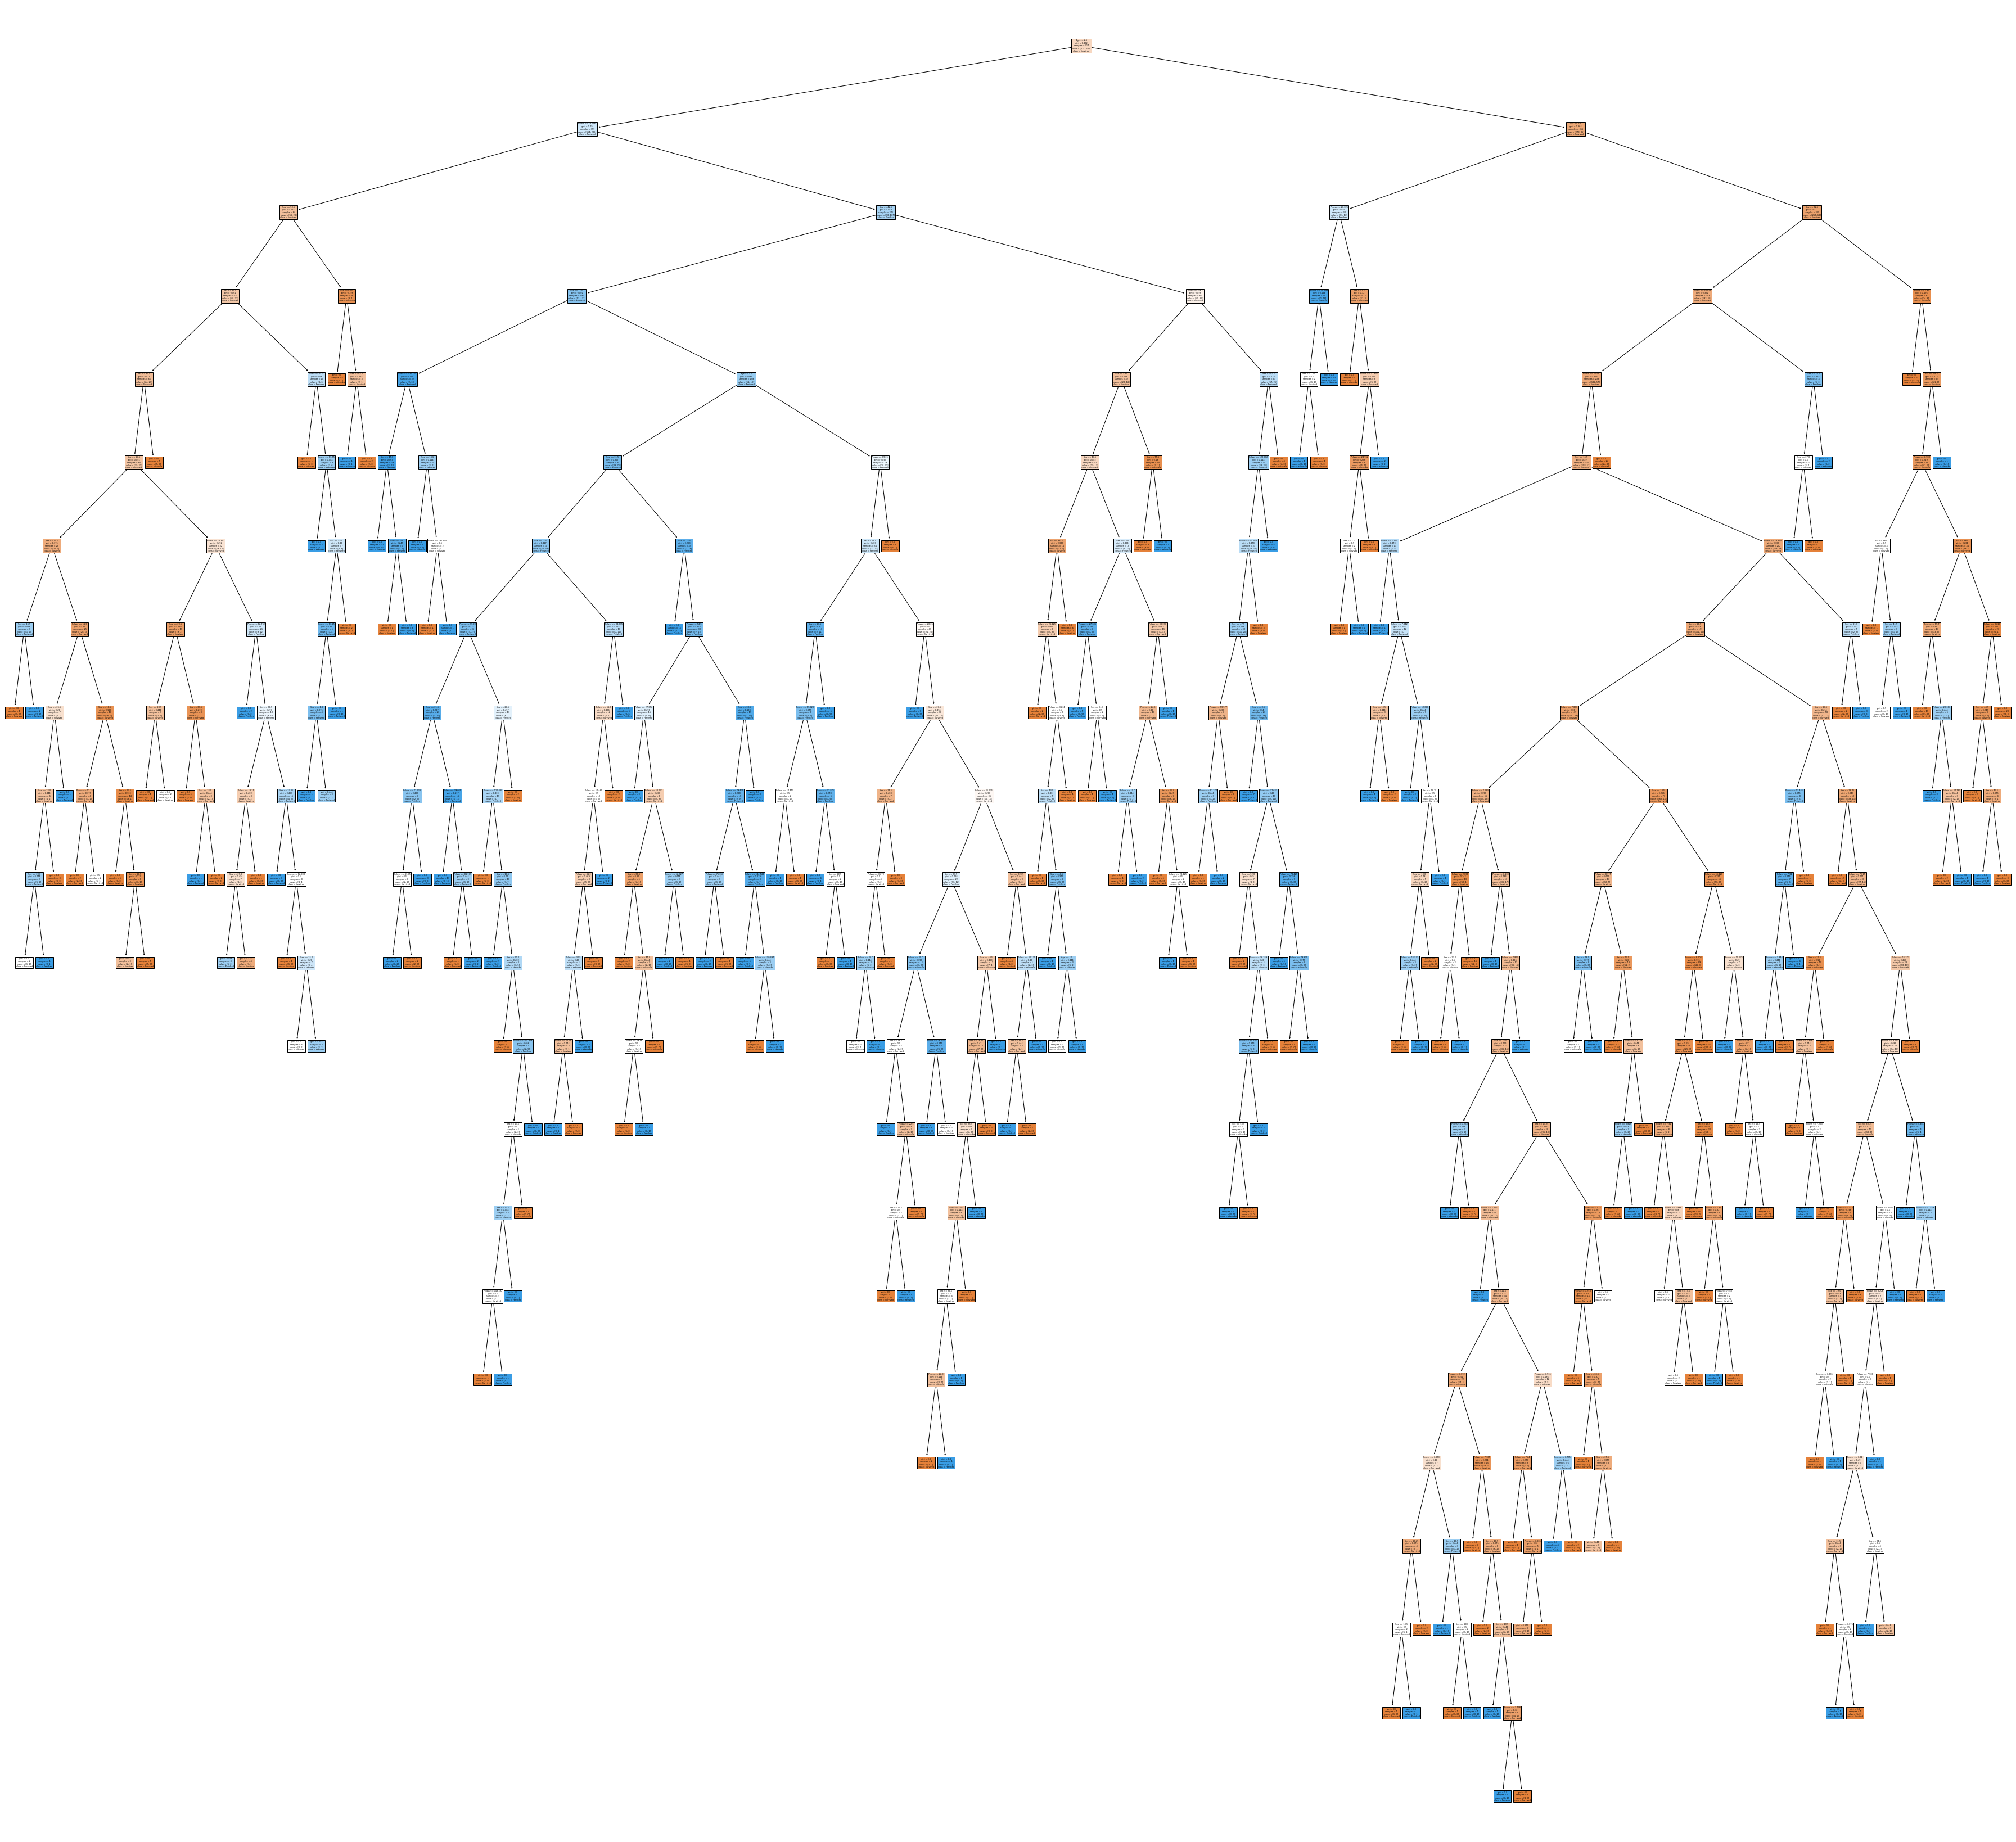

In [32]:
# Plot

fig = plt.figure(figsize = (64, 60))
_ = tree.plot_tree(decision_tree, feature_names=feature_cols, class_names=['Survived', 'Perished'], filled=True)

In [33]:
# Decision Tree Validation Scores

decision_tree_scores = cross_val_score(decision_tree, X, y, cv=5)
print(decision_tree_scores.mean())

0.6274401654683345


In [34]:
# Train Random Forest

random_forest = RandomForestClassifier(max_depth=4)
random_forest = random_forest.fit(X, y)

print('Done')

Done


In [35]:
# Random Forest Validation Scores

random_forest_scores = cross_val_score(random_forest, X, y, cv=5)
print(random_forest_scores.mean())

0.7185560917955284
